# STEP ONE: Intro / Ask the questions:

## How do non-modifiable risk factors affect rates of no-show appointments in a Brazilain clinic?
    - Non-modifiable are risk facotrs which the patient cannot alter (age, sex, genetic predisposition). 
    - Age and sex (sex represented as gender in this datset) are described in this dataset. 
    - To answer this question, we must first explore two more questions:
### 1) How does age affect rates of no-show appointments?
### 2) How does sex (gender) affect rates of no-show appointments?

## Introduction:
    The purpose of this data analysis is to elucidate the relationship, if any, bewtween non-modifiable risk factors of a population and whether they showed to their scheduled appointment. The csv file and environment.txt are included in the project folder. 
    
## Background:    
    This dataset was taken from kaggle and it follows 62,299 unique patients over the course of 110,527 different appointments. There were a total of 22,319 no-show appointments in this sample. The sample data was provided by Kaggle.com, https://www.kaggle.com/joniarroba/noshowappointments. Below is their description of the data:

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of 
> whether or not patients show up for their appointment. A number of characteristics about the patient are included 
> in each row.

> ‘ScheduledDay’ tells us on what day the patient set up their appointment.
> ‘Neighborhood’ indicates the location of the hospital.
> ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
> Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, 
> and ‘Yes’ if they did not show up.

    Non-modifiable risk factors are those risk factors with which patients have no control over, such as age, sex (sex approximated as gender in this dataset), and family history (genetics). If these factors have any effect on a patient's liklihood of being a no-show for appointments, there may be cultural reasons that could be examined in with further analysis and studies. Below we seek to answer the questions 1) does age have an affect on whether the patient will be a no-show, and 2) does gender have an affect on whether the pt will be a no-show?

## Methods:
    Jupyter Notebook of the Anaconda package was utilized to analyze the data using pandas and numpy for analysis and visualizations with numpy and matplotlib. Data from Kaggle.com was provided as a csv file. 

# STEP TWO: Importing packages and data:

## Packages:

In [1]:
# import of packages used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data:
    from a csv file

In [2]:
# data set examining no-shows at a clinic in Brazil, total visits
original_df = pd.DataFrame(pd.read_csv('noshowappointments-kagglev2-may-2016.csv'))

# STEP THREE: Constructing a clean dataframe

## Creating a dataframe with clean data:
    The original data pulled from the CSV was saved as a dataset. However, this data must be cleaned up before we use it. The data we will pull and clean will be Patient ID, Gender, Age, and No-show. 

### Cleaning 'Age' data from original data:

In [3]:
# Here we create dataframe of 'Age' on;y from original (total of 110527 rows)
clean_age_df = pd.DataFrame({'Age' : (original_df['Age'])})

# Here we filter to make sure that all data in Age is an integer (total of 110527 rows)
clean_age_df.select_dtypes(include=['int'])

# finding any data points (with its index) that yields a negative age:
clean_age_df[clean_age_df.Age <0]

,Age
99832,-1


#### !! One dirty data point found in 'Age':
    By means of the data clean-up we found one dirty data point, a negative age value. Of the original 110527 rows one, row 99832 is one we will need to remove when we put together a new, clean dataframe, 


Dirty point to be removed from original: 99832 -1

### Cleaning 'Gender' data from original data:

In [4]:
# Here we create a series from the original data containing all rows in 'Gender'
gender_series = original_df['Gender']

# Now we extract all 'M' and 'F' data points from 'Gender' column. data that is not an 'M' or 'F' will be NaN
clean_gender = '(?P<Gender>[MF])'
clean_gender_df = gender_series.str.extract(clean_gender, expand=True)

# Here we search for rows not containing an 'M' or an 'F', aka NaN
clean_gender_df[clean_gender_df.Gender == 'NaN']

# We find all rows contain an 'M' or an 'F'


,Gender


#### One dirty data point found in 'Gender':
    Of the original 110527 rows one, no rows contained a dirty data point. 

### Cleaning 'No-Show' data from original data:


In [5]:
# Here we create a dataframe that we will use later to filter other data through (length is 110527 rows)
noshow_original_df = pd.DataFrame({'No_show' : original_df['No-show'].map({'No': False, 'Yes' : True})})

# Here we ensure all data in the filter is a bool. if any NaNs exist it is because not all data in original was yes or no
clean_noshow = noshow_original_df.select_dtypes(include=['bool']) 

# clean_noshow length of 10527 rows indicates that all original data was yes and no, turned into true false for resulting filter. 

# therefore original dataframe passed as clean dataframe variable
noshow_clean_df = noshow_original_df

### Cleaning 'PatientId' data from original data:

In [6]:
# Here we create a series of Patient IDs from original dataset (110527 total rows)
patientid_series = original_df['PatientId']

# Here is a dataframe of patient IDs, total of 110527 rows 
patientid_clean_df = pd.DataFrame ({'PatientId' : original_df['PatientId']})

#### On Patient IDs in dataset:
    There is not enough known about how patient IDs are used to identify which IDs may be erroneous. Since Patient IDs are not a direct variable being evaluated, no assumptions are made to filter it. Patient IDs will be used to simply identify the mean age of total unique patients. The data from all 110527 rows is therefore included into the 'clean' dataframe.

### Putting it all together into one clean dataframe:
    Only one dirty data point was found in the original 'Age' and 'Gender' data, row 99832 (-1) of 'Age'. Before proceeding to analysis, this index must be removed from both data set (as well as 'PatientId'. 
    

In [7]:
def drop_dirty_data(dataframe):
    return dataframe.drop(99832)

clean_total_df = pd.concat([(patientid_clean_df.apply(drop_dirty_data)), 
           (clean_age_df.apply(drop_dirty_data)),
           (clean_gender_df.apply(drop_dirty_data)),
           (noshow_clean_df.apply(drop_dirty_data)), 
           ], 
          axis=1) 

#### About 'clean_total_df':
    Only one row from the total 110527 rows had to be dropped due to dirty data, resulting in a clean dataframe of 110526 rows. We can now use this dataframe to go forward with our analysis. 

# STEP Four: Analyzing data:

## 1) Answering  "How does age affect rates of no-show appointments?"

### Computing statistical analysis of total patient visits age:

In [8]:
clean_total_df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

#### Analysis of total patient visits age:
    The mean age of all patient visits (including multiple visits from the same patient) is approximately 37.09 years old. The youngest patients to visit the clinic were 0 years old, while the oldest were 115. The standard deviation was found to be approximately 23.11 years. 

#### Plotting Age distribution of ages in total patient visits:

Text(0.5,1,'Frequency of Ages in Total Visits (110,526 total)')

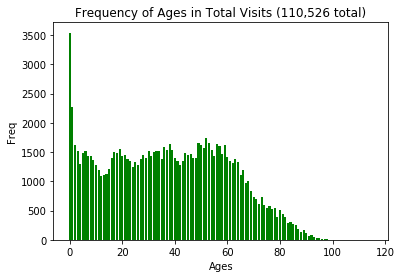

In [9]:
# creating a dataframe of age vs frequency
age_v_freq_total = clean_total_df.groupby('Age').count()
age_v_freq_total.reset_index(level=0, inplace=True)

# x is list of ages and y is frequency (in this case, gender since all other columns of dataframe list freq of age due
# to groupby function)
x1 = age_v_freq_total['Age']
y1 = age_v_freq_total['Gender']

# creating the plot
plt.figure()
plt.bar(x1, y1, color='g')
plt.xlabel('Ages')
plt.ylabel('Freq')
plt.title('Frequency of Ages in Total Visits (110,526 total)')




### Computing statistical analysis of unique patients age:

In [10]:
# To make a series of unique pts and their ages:
age_total_unique = clean_total_df.drop_duplicates('PatientId')

In [11]:
age_total_unique['Age'].describe()

count    62298.000000
mean        36.705496
std         23.531076
min          0.000000
25%         17.000000
50%         36.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

#### Analysis of only unique patients visiting clinic (unique patients age vs total visits age):
    There are 62298 unique patients that visited the clinic. The mean age of only unique patients visiting the clinic is approximately 36.71 years old. The youngest patients to visit the clinic were 0 years old, while the oldest were 115. The standard deviation was found to be approximately 23.53. These values are very similar to the ages in total patient visits, with the mean age of unique patiens being .38 years younger than the mean gae of total visists. The standard deviation of unique patients was .4 years more than the standard deviation of total visits, indicating there is slightly more variation in age in unique patients versus age of total visits. 
    
    The unique patient standard deviation is only approximately 1.7% of the standard deviation of the total patient visits (0.4 / 23.11). The unique patient mean age is only approximately 1% from the total patient mean age (0.38 / 37.09). 
    
    Due to the similarities in the datasets, it can be concluded that the total visits of patients is not overly represented by one particular age group, otherwise greater discrepensies between the two groups would be noted. 

In [12]:
age_total_unique = clean_total_df.drop_duplicates('PatientId')


<BarContainer object of 103 artists>

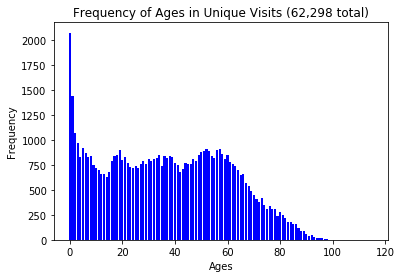

In [13]:
# creating a dataframe of age vs frequency
age_v_freq_unique = age_total_unique.groupby('Age').count()
age_v_freq_unique.reset_index(level=0, inplace=True)

# x is list of ages and y is frequency (in this case, gender since all other columns of dataframe list freq of age due
# to groupby function)
x2 = age_v_freq_unique['Age']
y2 = age_v_freq_unique['Gender']

# creating the plot
plt.figure()
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Frequency of Ages in Unique Visits (62,298 total)')
plt.bar(x2, y2, color='b')

### Computing statistical analysis of no-show patients age:

In [14]:
# creating dataframe of only noshow rows 
age_total_noshow = clean_total_df[(clean_total_df.No_show == True)]

#stat analysis of noshow True ages
age_total_noshow['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

#### Analysis of only unique patients visiting clinic (unique patients age vs total visits age):¶
    The mean age of only noshow patients is approximately 34.31 years old. The youngest noshow patients were 0 years old, while the oldest were 115. The standard deviation was found to be approximately 23.11 years. These values are very similar to the ages in total patient visits though more dissimilar than total unique patients. The mean age of noshow patiens was 2.78 years younger than the mean gae of total visists. The standard deviation of noshow patients was 1.14 years more than the standard deviation of total visits, indicating there is more variation in age in noshow patients versus age of total visits. 

    The unique patient standard deviation is approximately 4.9% lower than the standard deviation of the total patient visits (0.49 / 23.11). The noshow patient mean age is only approximately 7.5% lower than the total patient mean age (2.78 / 37.09). 

    Therefore the mean noshow age is lower (by 7.5%) than the mean age of total visists. Additionally, there is less age variation in the group of noshow patients. 
    

#### Plotting Age distribution of ages in noshow patient visits:

<BarContainer object of 100 artists>

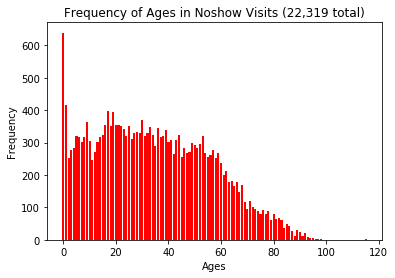

In [15]:
# creating a dataframe of age vs frequency
age_v_freq_noshow = age_total_noshow.groupby('Age').count()
age_v_freq_noshow.reset_index(level=0, inplace=True)

# x is list of ages and y is frequency (in this case, gender since all other columns of dataframe list freq of age due
# to groupby function)
x3 = age_v_freq_noshow['Age']
y3 = age_v_freq_noshow['Gender']

# creating the plot
plt.figure()
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Frequency of Ages in Noshow Visits (22,319 total)')
plt.bar(x3, y3, color='r')


### Total vs unique vs noshow patient visits analysis:

#### Plotting Age distribution of ages in total vs unique vs noshow patient visits:
    Here we see that the age distribution of each group to be quite similar. 

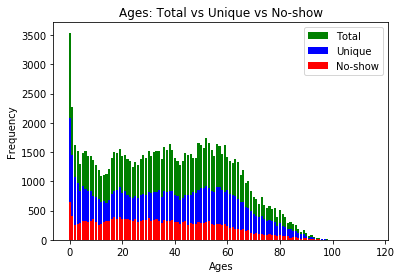

In [16]:
p1 = plt.bar(x1, y1, color='g')
p2 = plt.bar(x2, y2, color='b')
p3 = plt.bar(x3, y3, color='r')


plt.ylabel('Frequency')
plt.xlabel('Ages')
plt.title('Ages: Total vs Unique vs No-show')
plt.legend((p1[0], p2[0], p3[0]), ('Total', 'Unique', 'No-show'))

plt.show()

#### A closer look at the differences in mean age between total vs unique vs noshow patient visits:

Text(0.5,1,'Mean Age in Total Visits vs. Unique vs. No-shows')

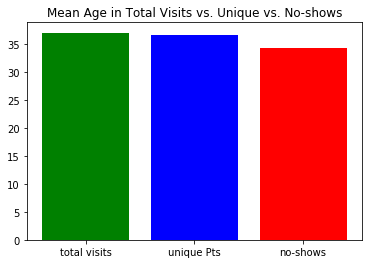

In [17]:
# inputs for bar plot
categories = ('total visits', 'unique Pts', 'no-shows')
means = (37.09, 36.70, 34.32)

# bar plot
plt.bar(categories, means, align='center', color=('g', 'b', 'r'))
plt.ylabel = ('Mean age')
plt.title('Mean Age in Total Visits vs. Unique vs. No-shows')

    The mean age of total patient visits is the highest at 37.09 years, with mean age of unique patients not far behind at 36.70 years. Below it becomes clearer that the mean age of noshow patients is slightly lower than either of the other groups, at 34.32 years. 
    This indicates that younger patients may be more likely to be noshow patients. 

#### A closer look at the differences in mean age and standard deviation between total vs unique vs noshow patient visits:

Text(0.5,1,'STD in Total Visits vs. Unique vs. No-shows')

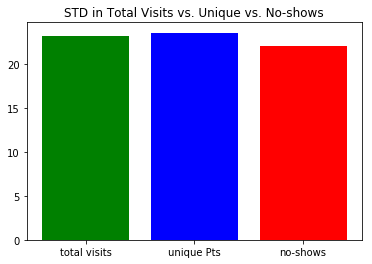

In [18]:
# inputs for bar plot
categories = ('total visits', 'unique Pts', 'no-shows')
means = (23.11, 23.53, 21.97)

# bar plot
plt.bar(categories, means, align='center', color=('g', 'b', 'r'))
plt.ylabel = ('Mean age')
plt.title('STD in Total Visits vs. Unique vs. No-shows')

    The group with the highest standard deviation in age is the group of unique patients, indicating that this group has the greatest variation of age from the mean (at 23.53 years). The standard deviation of the age in total visists is close to the unique group at 23.11 years. As we see here again the noshow group is more dissimilar than the other groups, with its standard deviation being lower at 21.97 years. This means that the age deviation from the mean is lower than the total visits or total unique patients than in noshows. 
    This further supports an argument that younger people are more likely to be noshows to appointments as the mean age is younger, and the deviation from the mean is less than total visits and total uniqe patients. 

## 2) How does sex (gender) affect rates of no-show appointments?

### Age and No-show Analysis:


In [19]:
# passing gender data through Boolean filter
gender_noshow_filtered = pd.DataFrame({'Gender' : (clean_total_df['Gender'][clean_total_df['No_show']])})

# dict of percentages male vs female in total group (110527.000000)
m_v_f_total = ({'Male' : ((clean_total_df['Gender'] == 'M').sum()), 'Female' : ((clean_total_df['Gender'] == 'F').sum())})

# dict of percentages of male vs female in no-show group (22319.000000)
m_vs_f_noshow = ({'Male' : ((gender_noshow_filtered['Gender'] == 'M').sum()), 'Female' : ((gender_noshow_filtered['Gender'] == 'F').sum())})

#### Male vs. Female Percentages of Total Visits:


Text(0.5,1,'Male vs. Female Ratio in Total Visits')

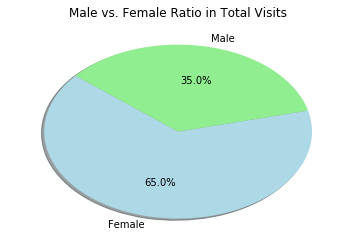

In [20]:
# Pie graph representing Male vs Female share of total visits

# Graph inputs
labels = 'Female', 'Male'
percents = [
    ((m_v_f_total['Female']/(m_v_f_total['Female']+m_v_f_total['Male']))*100),
    ((m_v_f_total['Male']/(m_v_f_total['Female']+m_v_f_total['Male']))*100)
    ]
colors = ['lightblue', 'lightgreen']
 
# Plot
plt.pie(percents, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Male vs. Female Ratio in Total Visits')

        Here we see that the ratio of male to female in total patient visits is 35% to 65%. 

### Male vs. Female Percentages of No-shows:

Text(0.5,1,'Male vs. Female Ratio in No-shows')

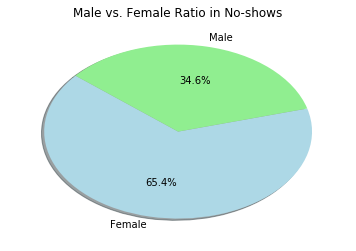

In [21]:
# Pie graph representing Male vs Female share of No-shows

# Graph inputs
labels = 'Female', 'Male'
percents = [
    ((m_vs_f_noshow['Female']/(m_vs_f_noshow['Female']+m_vs_f_noshow['Male']))*100), 
    ((m_vs_f_noshow['Male']/(m_vs_f_noshow['Female']+m_vs_f_noshow['Male']))*100)
    ]
colors = ['lightblue', 'lightgreen']
 
# Plot
plt.pie(percents, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Male vs. Female Ratio in No-shows')


            Here we see that the ratio of male to female in noshow patient visits is 34.6% and 65.4%, very similar to the ratio in total patient vistis, 35% to 65%. 
            
#### Conclusions on impact of sex (gender)  on noshow occurance. 
            There does not seem to be any significant difference in sex (represented in this data as gender) between total visits and noshow occurances.

# STEP Five: Conclusions:

## Age and No-show Results:
    As we see above, the mean age of all patients from all visits is 37.09 years old, the mean age of all unique patients who visit the clinic is 36.71 years old, and the mean age of no-show patients is 34.31 years old. From this it is clear that the mean age of all patients and unique patients are similar, meaning that the pool of unique patients and patients visiting the clinic are not dissimilar (meaning that the clinic visit ages by repeat patients that make up the total count are not too overly represented by one age cohort over another). 
    The difference between the mean age of total visits and no-shows is 2.78 years, which is a difference of 7.5%. This, in addition to a lower standard deviation, may indicate a slight correlation between age and noshow. This may be significant and may warrant further investigation into what may be causing younger people to miss their appointments more often. 

## Age and No-show Results:
    The data does not demonstrate any significant difference between sex(represented here by gender) and whether that patient was a no-show. The percentage of males and females in total visits was 35% for females and 65% for males. The percentage of males and females in no-shows visits was 34.6% for females and 65% for males. 

## Limitations:
    Only one data point in age was identified to be erroneous and therefore removed (row 99832 (-1)). Additionally, the method by which patient IDs are created and assigned was not described in the study, and no attempt was made to weed out erroneous IDs as their structure was not defined (and they were not being directly compared by the analysis). 
    
